# 4 Семинар статистические гипотезы и Параметрические критерии

# 1. Ошибка второго рода

Определение \
**Ошибка второго рода (β)** — это вероятность не отклонить нулевую гипотезу, когда она на самом деле ложна. \
Важность вычисления β \
**Мощность теста (1 - β)** — вероятность правильно отклонить нулевую гипотезу, когда альтернативная гипотеза истинна.
Знание β помогает оценить вероятность пропустить существующий эффект или различие. \
Факторы, влияющие на β \
**Размер выборки (n)**: Увеличение n уменьшает β. \
**Уровень значимости (α)**: Снижение α увеличивает β. \
Величина эффекта (разница между истинным значением и гипотетическим): Чем больше разница, тем меньше β. \
**Стандартное отклонение (σ)**: Меньшее σ приводит к меньшему β.

### Задача

Производитель утверждает, что средний вес его упаковки риса составляет 1 кг. Контроль качества хочет проверить, не занижает ли производитель вес. \
Стандартное отклонение σ = 15 г.
Размер выборки n = 25.
Уровень значимости α = 0.05. \
Нулевая гипотеза (H₀): μ = 1000 г
Альтернативная гипотеза (H₁): μ < 1000 г

Требуется:

Определить критическое значение и область критических значений. \
Вычислить вероятность ошибки второго рода (β), т.е. вероятность не обнаружить занижение веса. \
Найти мощность теста (1 - β).

Для одностороннего левого z-теста с α = 0.05

Однако, поскольку σ известно, можем использовать z-тест. \
mu1 = 990       # Истинный средний вес (г)

In [ ]:
import numpy as np
from scipy.stats import norm

# Данные задачи
mu0 = 1000      # Гипотетический средний вес (г)
mu1 = 990       # Истинный средний вес (г)
sigma = 15      # Стандартное отклонение (г)
n = 25          # Размер выборки
alpha = 0.05    # Уровень значимости

# Шаг 1: Критическое значение
z_alpha = norm.ppf(alpha)  # Односторонний левый тест
x_critical = mu0 + z_alpha * (sigma / np.sqrt(n))

print(f"Критическое значение по весу: {x_critical:.3f} г")

# Шаг 2: Вычисление β
z_beta = (x_critical - mu1) / (sigma / np.sqrt(n))
beta = 1 - norm.cdf(z_beta)  # P(Z ≥ z_beta)

print(f"Значение z для β: {z_beta:.3f}")
print(f"Вероятность ошибки второго рода β: {beta:.4f}")

# Шаг 3: Мощность теста
power = 1 - beta
print(f"Мощность теста: {power:.4f}")

Критическое значение по весу: 995.065 г
Значение z для β: 1.688
Вероятность ошибки второго рода β: 0.0457
Мощность теста: 0.9543


Низкое значение β (4.55%) означает, что вероятность не обнаружить занижение веса (когда оно есть) невелика. \
Высокая мощность теста (95.45%) говорит о высокой способности теста обнаружить отклонение от нулевой гипотезы.

Влияние размера выборки на β и мощность теста

Давайте посмотрим, как изменение размера выборки n повлияет на β и мощность теста.
Увеличим размер выборки до n = 50

In [ ]:
n_new = 50  # Новый размер выборки

# Перерасчет критического значения x_critical с новым n
x_critical_new = mu0 + z_alpha * (sigma / np.sqrt(n_new))
print(f"\nПри n = {n_new}:")
print(f"Критическое значение по выборочному среднему (X_кр): {x_critical_new:.3f} г")

# Новый z_beta
z_beta_new = (x_critical_new - mu1) / (sigma / np.sqrt(n_new))
print(f"Значение z_beta: {z_beta_new:.3f}")

# Новая β и мощность
beta_new = 1 - norm.cdf(z_beta_new)
power_new = 1 - beta_new
print(f"Вероятность ошибки второго рода β: {beta_new:.4f}")
print(f"Мощность теста: {power_new:.4f}")



При n = 50:
Критическое значение по выборочному среднему (X_кр): 996.511 г
Значение z_beta: 3.069
Вероятность ошибки второго рода β: 0.0011
Мощность теста: 0.9989


**Интерпретация:**

Увеличение n уменьшило стандартную ошибку среднего
​Что привело к более узкому распределению выборочного среднего.
Значение z_beta значительно увеличилось, что уменьшило β до очень малого значения (0.01%).
**Мощность теста** приблизилась к 100%, что означает, что тест почти всегда обнаружит занижение веса при таком размере выборки.

**Увеличение размера выборки** — эффективный способ уменьшить вероятность ошибки второго рода.
Компромисс между α и β: При фиксированном α увеличение n позволяет уменьшить β без изменения риска ошибки первого рода.

**Ошибка второго рода (β)**: вероятность не обнаружить эффект, когда он на самом деле существует.

**Мощность теста (1 - β)**: способность теста обнаружить эффект.
Важность размера выборки (n): увеличение n снижает β и повышает мощность теста.
Критические значения: определяют область принятия или отклонения нулевой гипотезы.

**Почему мы использовали z-тест, а не t-тест в этой задаче?**

**Ответ**: z-тест используется, когда стандартное отклонение генеральной совокупности (σ) известно и данные имеют нормальное распределение или размер выборки достаточно большой (обычно n > 30). В нашей задаче σ известно и n = 25, что допускает использование z-теста, особенно если предполагается нормальность распределения веса упаковок.

Как можно уменьшить вероятность ошибки второго рода без увеличения размера выборки?

**Ответ:**
Увеличение уровня значимости (α): Это уменьшит β, но увеличит риск ошибки первого рода. Такой подход оправдан, если последствия ошибки второго рода серьезнее.
Уменьшение вариабельности данных (σ): Улучшение методов измерения или контроля процесса может снизить σ.
Увеличение величины эффекта: Если возможно, увеличить разницу между μ₀ и μ₁ (например, выявить более значимые отклонения).

### Степень свободы

**Степень свободы** — это ключевое понятие в статистике, связанное с количеством независимых элементов, которые можно изменять в выборке или данных, не нарушая условий, наложенных на систему. Число степеней свободы (d.f. — degrees of freedom) помогает при расчётах в различных статистических тестах и используется для точной интерпретации результатов.

**Степень свободы** определяет количество независимых значений в выборке, которые могут варьироваться при расчёте статистики (например, среднего, дисперсии и т.д.). Когда мы вычисляем определённую статистическую величину, часть данных становится зависимой от других значений, поскольку итоговое значение уже частично зафиксировано.

**Например:** В выборке из n значений, когда мы фиксируем среднее значение, n−1 значений можно выбирать произвольно, но последнее значение будет зависеть от средних значений, чтобы сохранить тот же средний показатель.

**Одномерная выборка**: При вычислении таких величин, как стандартное отклонение или дисперсия, обычно степень свободы равна n−1, где n — это количество наблюдений в выборке. Это связано с тем, что при расчёте дисперсии сначала необходимо знать среднее, и одно из значений уже будет зависеть от остальных.

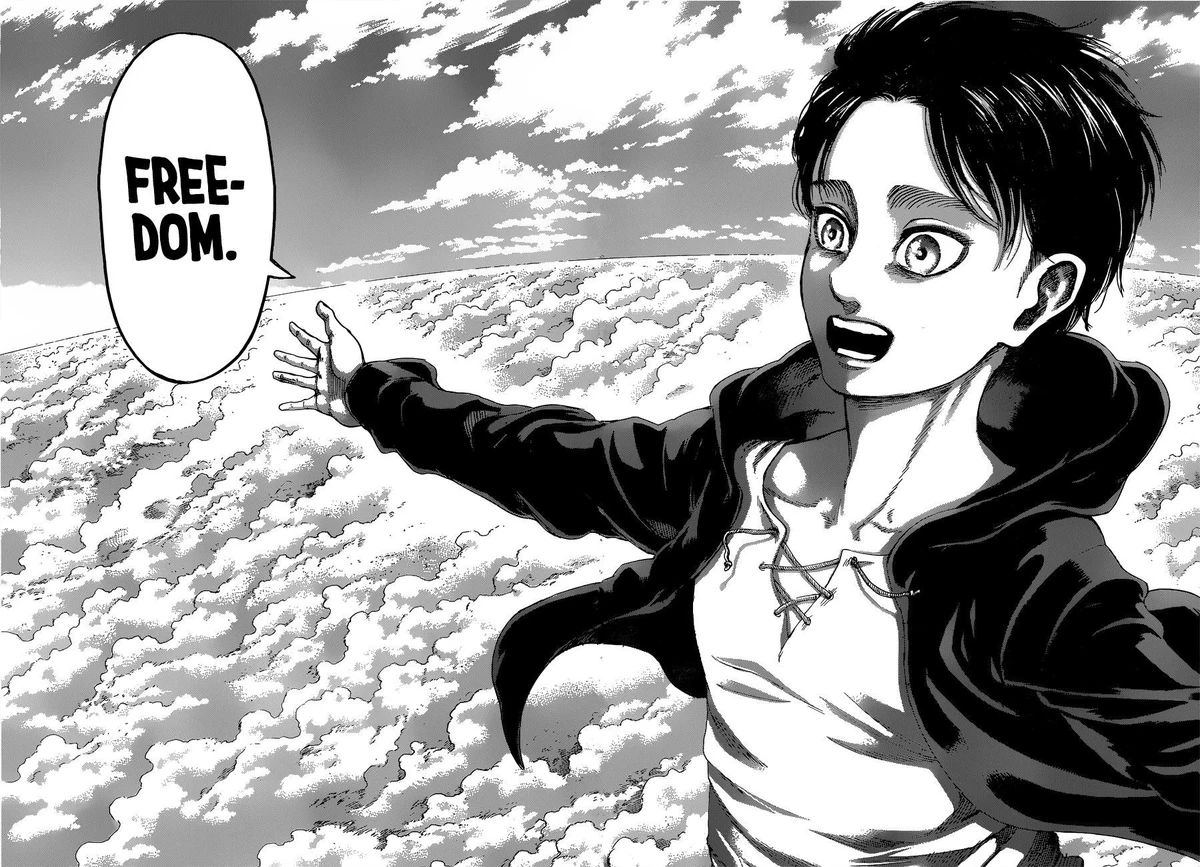

# Разбор задач на статистические критерии

## Задача 1

Компания по производству лампочек утверждает, что 95% её продукции работает более 1000 часов. Контрольное агентство решило проверить это утверждение. Они взяли случайную выборку из 200 лампочек и обнаружили, что 182 лампочки работали более 1000 часов.

Требуется:

На уровне значимости α = 0.05 проверить, соответствует ли реальная доля лампочек, работающих более 1000 часов, заявленной компанией доле.

Формулировка гипотез

Нулевая гипотеза (H₀): Реальная доля лампочек, работающих более 1000 часов, равна 95%. \
**H0: p=p0=0.95** \

Альтернативная гипотеза (H₁): Реальная доля лампочек не равна 95%.

**H0: p!=p0!=0.95**

Это двусторонний тест. \
Z-критерий для доли применим, если выполняются следующие условия:

Случайная выборка: \
Выборка должна быть случайной. В задаче это условие выполняется \
Независимость наблюдений: \
При выборке без возврата размер генеральной совокупности должен быть значительно больше размера выборки (обычно более чем в 10 раз). Предположим, что общее количество лампочек значительно превышает 200.

Стандартная ошибка выборочной пропорции (при использовании p0​): \
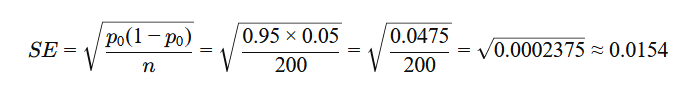

Выборочная доля

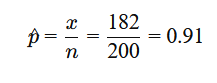

Z-статистика

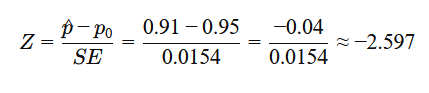

Определение критических значений

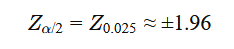

Z=−2.597 меньше −1.96, поэтому отклоняем нулевую гипотезу.

p-значение для двустороннего теста:

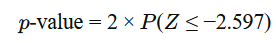

Используя функцию стандартного нормального распределения:

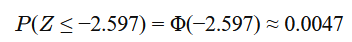

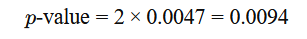

Поскольку p-value=0.0094 меньше α=0.05, отклоняем нулевую гипотезу.

Вывод: Есть статистически значимое различие между заявленной долей и фактической долей лампочек, работающих более 1000 часов. Фактическая доля ниже заявленной.

In [ ]:
import numpy as np
from scipy import stats

# Данные задачи
n = 200          # Размер выборки
x = 182          # Количество лампочек, работающих более 1000 часов
p0 = 0.95        # Заявленная доля
alpha = 0.05     # Уровень значимости

# Шаг 3: Выборочная пропорция
phat = x / n
print(f"Выборочная пропорция (p̂): {phat:.4f}")

# Шаг 4: Стандартная ошибка
SE = np.sqrt(p0 * (1 - p0) / n)
print(f"Стандартная ошибка (SE): {SE:.4f}")

# Шаг 5: Z-статистика
Z = (phat - p0) / SE
print(f"Z-статистика: {Z:.4f}")

# Шаг 7: Вычисление p-значения
p_value = 2 * stats.norm.cdf(Z)  # Для отрицательного Z
print(f"p-значение: {p_value:.4f}")

# Принятие решения
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: реальная доля отличается от заявленной.")
else:
    print("Не отклоняем нулевую гипотезу: статистически значимых отличий нет.")


Выборочная пропорция (p̂): 0.9100
Стандартная ошибка (SE): 0.0154
Z-статистика: -2.5955
p-значение: 0.0094
Отклоняем нулевую гипотезу: реальная доля отличается от заявленной.


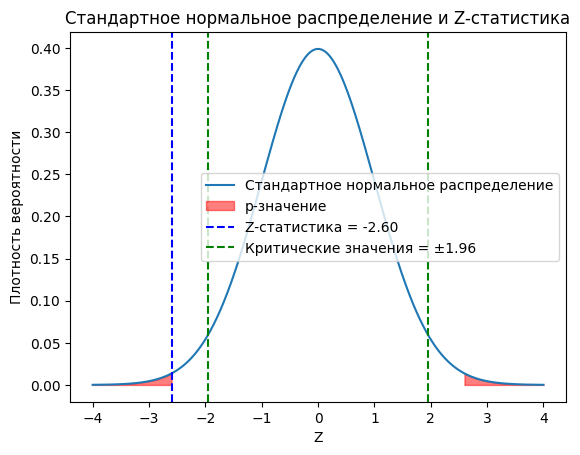

In [ ]:
import matplotlib.pyplot as plt

# Создание диапазона значений Z
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

# Критические значения
z_critical = stats.norm.ppf(1 - alpha/2)

# Построение графика
plt.plot(z_values, pdf, label='Стандартное нормальное распределение')

# Закрашиваем области p-значения
plt.fill_between(z_values, pdf, where=(z_values <= -abs(Z)), color='red', alpha=0.5)
plt.fill_between(z_values, pdf, where=(z_values >= abs(Z)), color='red', alpha=0.5, label='p-значение')

# Отмечаем Z-статистику
plt.axvline(Z, color='blue', linestyle='--', label=f'Z-статистика = {Z:.2f}')

# Отмечаем критические значения
plt.axvline(-z_critical, color='green', linestyle='--', label=f'Критические значения = ±{z_critical:.2f}')
plt.axvline(z_critical, color='green', linestyle='--')

plt.legend()
plt.title('Стандартное нормальное распределение и Z-статистика')
plt.xlabel('Z')
plt.ylabel('Плотность вероятности')
plt.show()


## Задача 2

Два завода производят одинаковые детали. На первом заводе из 500 деталей бракованными оказались 30 деталей. На втором заводе из 400 деталей бракованными оказались 20 деталей.

Требуется:

Проверить на уровне значимости α = 0.05, существует ли значимая разница в долях бракованных деталей между двумя заводами.

Нулевая гипотеза (H₀): Доли бракованных деталей на двух заводах равны. \
H0:p1=p2

Альтернативная гипотеза (H₁): Доли бракованных деталей на двух заводах не равны. \
H1​:p1!​=p2​

Вычисление выборочных долей
Для первого завода: \
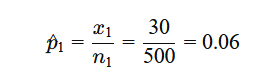

Для второго завода:

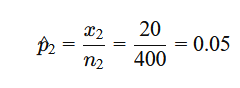

Единая доля \
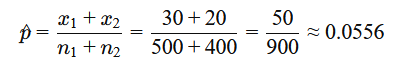

Стандартная ошибка разности долей:

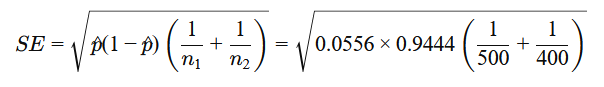

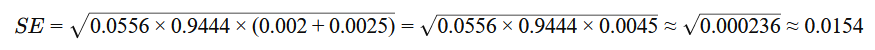

Z-статистика:

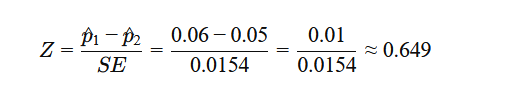

Для двустороннего теста на уровне значимости α=0.05, критические значения Z:

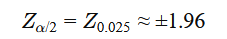

Сравниваем вычисленную Z-статистику с критическими значениями:

Поскольку Z=0.649 находится между −1.96 и 1.96, не отклоняем нулевую гипотезу.

p-значение для двустороннего теста:

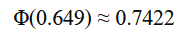

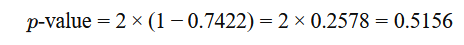

Поскольку p-value=0.515 больше α=0.05, не отклоняем нулевую гипотезу.

Вывод: Нет статистически значимой разницы в долях бракованных деталей между двумя заводами. Различия могут быть объяснены случайными вариациями.

In [ ]:
import numpy as np
from scipy import stats

# Данные задачи
n1 = 500         # Размер выборки на первом заводе
x1 = 30          # Количество бракованных деталей на первом заводе
n2 = 400         # Размер выборки на втором заводе
x2 = 20          # Количество бракованных деталей на втором заводе
alpha = 0.05     # Уровень значимости

# Шаг 2: Выборочные пропорции
p1_hat = x1 / n1
p2_hat = x2 / n2
print(f"Выборочная пропорция на первом заводе (p1̂): {p1_hat:.4f}")
print(f"Выборочная пропорция на втором заводе (p2̂): {p2_hat:.4f}")

# Шаг 3: Объединенная пропорция
p_hat = (x1 + x2) / (n1 + n2)
print(f"Объединенная пропорция (p̂): {p_hat:.4f}")

# Шаг 4: Стандартная ошибка
SE = np.sqrt(p_hat * (1 - p_hat) * (1/n1 + 1/n2))
print(f"Стандартная ошибка (SE): {SE:.4f}")

# Шаг 5: Z-статистика
Z = (p1_hat - p2_hat) / SE
print(f"Z-статистика: {Z:.4f}")

# Шаг 7: Вычисление p-значения
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))
print(f"p-значение: {p_value:.4f}")

# Принятие решения
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: доли бракованных деталей различаются.")
else:
    print("Не отклоняем нулевую гипотезу: статистически значимых различий нет.")


Выборочная пропорция на первом заводе (p1̂): 0.0600
Выборочная пропорция на втором заводе (p2̂): 0.0500
Объединенная пропорция (p̂): 0.0556
Стандартная ошибка (SE): 0.0154
Z-статистика: 0.6508
p-значение: 0.5152
Не отклоняем нулевую гипотезу: статистически значимых различий нет.


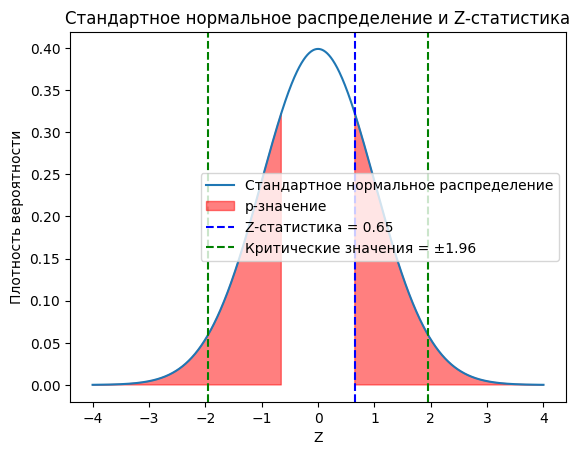

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Создание диапазона значений Z
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

# Критические значения
z_critical = stats.norm.ppf(1 - alpha/2)

# Построение графика
plt.plot(z_values, pdf, label='Стандартное нормальное распределение')

# Закрашиваем области p-значения
plt.fill_between(z_values, pdf, where=(abs(z_values) >= abs(Z)), color='red', alpha=0.5, label='p-значение')

# Отмечаем Z-статистику
plt.axvline(Z, color='blue', linestyle='--', label=f'Z-статистика = {Z:.2f}')

# Отмечаем критические значения
plt.axvline(-z_critical, color='green', linestyle='--', label=f'Критические значения = ±{z_critical:.2f}')
plt.axvline(z_critical, color='green', linestyle='--')

plt.legend()
plt.title('Стандартное нормальное распределение и Z-статистика')
plt.xlabel('Z')
plt.ylabel('Плотность вероятности')
plt.show()


Результат: Статистический анализ показывает, что различия в долях бракованных деталей между двумя заводами не являются статистически значимыми.

## Задача 3.

Известно, что средний вес упаковки кофе составляет 500 грамм с известным стандартным отклонением 15 грамм. Сотрудник магазина подозревает, что поставщик стал недовкладывать кофе в упаковки. Он измерил вес 100 упаковок и получил средний вес 495 грамм.

Требуется:

На уровне значимости α = 0.01 проверить, снизился ли средний вес упаковок кофе.

Нулевая гипотеза (H₀): Средний вес упаковки кофе равен 500 грамм.

Альтернативная гипотеза (H₁): Средний вес упаковки кофе меньше 500 грамм.

Это односторонний левосторонний тест.

**Z-критерий для среднего применим, если:**

Стандартное отклонение и (σ) известно. В задаче σ=15 известно.

Выборка случайная и независимая. Предполагаем, что это так.

Распределение выборочного среднего нормально. Для больших выборок (обычно n≥30) согласно Центральной предельной теореме выборочное среднее приближается к нормальному распределению. Здесь n=100, что удовлетворяет условию.

Стандартная ошибка среднего (SE):

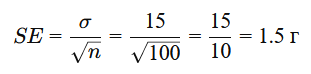

Z-статистика:

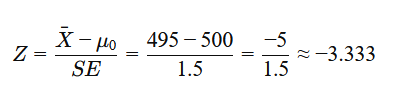

Для одностороннего левостороннего теста на уровне значимости α=0.01, критическое значение Z определяется как: \
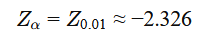

Сравниваем вычисленную Z-статистику с критическим значением:
**Z=−3.333 меньше Zα=−2.32**, поэтому мы отклоняем нулевую гипотезу.

p-значение:

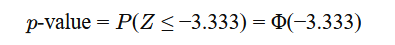

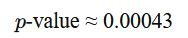

Поскольку p-value=0.00043 меньше уровня значимости α=0.01, мы отклоняем нулевую гипотезу.

Вывод: Есть статистически значимые доказательства того, что средний вес упаковок кофе снизился ниже 500 грамм.

In [ ]:
import numpy as np
from scipy import stats

# Данные задачи
mu0 = 500         # Гипотетическое среднее (г)
sigma = 15        # Известное стандартное отклонение (г)
n = 100           # Размер выборки
x_bar = 495       # Выборочное среднее (г)
alpha = 0.01      # Уровень значимости

# Шаг 3: Стандартная ошибка
SE = sigma / np.sqrt(n)
print(f"Стандартная ошибка (SE): {SE:.2f} г")

# Шаг 4: Z-статистика
Z = (x_bar - mu0) / SE
print(f"Z-статистика: {Z:.4f}")

# Шаг 5: Критическое значение
Z_alpha = stats.norm.ppf(alpha)
print(f"Критическое значение Z_alpha: {Z_alpha:.4f}")

# Шаг 6: p-значение
p_value = stats.norm.cdf(Z)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if Z <= Z_alpha:
    print("Отклоняем нулевую гипотезу: средний вес упаковок снизился.")
else:
    print("Не отклоняем нулевую гипотезу: нет статистически значимого снижения веса.")


Стандартная ошибка (SE): 1.50 г
Z-статистика: -3.3333
Критическое значение Z_alpha: -2.3263
p-значение: 0.00043
Отклоняем нулевую гипотезу: средний вес упаковок снизился.


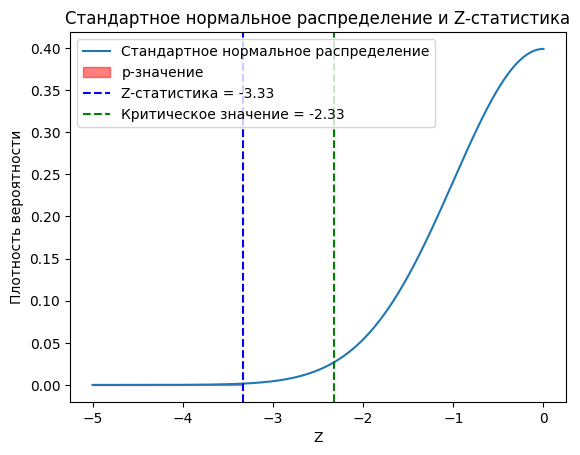

In [ ]:
import matplotlib.pyplot as plt

# Создание диапазона значений Z
z_values = np.linspace(-5, 0, 1000)
pdf = stats.norm.pdf(z_values)

# Критическое значение
Z_alpha = stats.norm.ppf(alpha)

# Построение графика
plt.plot(z_values, pdf, label='Стандартное нормальное распределение')

# Закрашиваем область p-значения
plt.fill_between(z_values, pdf, where=(z_values <= Z), color='red', alpha=0.5, label='p-значение')

# Отмечаем Z-статистику и критическое значение
plt.axvline(Z, color='blue', linestyle='--', label=f'Z-статистика = {Z:.2f}')
plt.axvline(Z_alpha, color='green', linestyle='--', label=f'Критическое значение = {Z_alpha:.2f}')

plt.legend()
plt.title('Стандартное нормальное распределение и Z-статистика')
plt.xlabel('Z')
plt.ylabel('Плотность вероятности')
plt.show()


Результат: Статистический анализ показывает, что средний вес упаковок кофе снизился ниже заявленного 500 грамм.

## Задача 4

В исследовании сравнивают эффективность двух методов обучения математике. В первой группе (Группа A) обучается 15 студентов, средний результат теста у них составляет 78 баллов с выборочным стандартным отклонением 5 баллов. Во второй группе (Группа B) обучается 12 студентов, средний результат — 82 балла с выборочным стандартным отклонением 6 баллов.

Требуется:

На уровне значимости α = 0.05 определить, есть ли статистически значимая разница в средних результатах теста между двумя группами.

Нулевая гипотеза (H₀): Средний результат во второй группе не выше, чем в первой. \
H0​:μ2​≤μ1​ \
Альтернативная гипотеза (H₁): Средний результат во второй группе выше, чем в первой. \
H1​:μ2​>μ1​

Это односторонний правосторонний тест.

t-критерий для независимых выборок применим, если:

1 Две независимые случайные выборки. Условие выполняется.
2 Распределения в группах приблизительно нормальны. Предполагаем, что это так (можно проверить с помощью теста Шапиро-Уилка при необходимости).
3 Дисперсии в группах равны. Предполагаем, что это так (можно проверить с помощью теста Фишера при необходимости)

Вычисление объединенной выборочной дисперсии

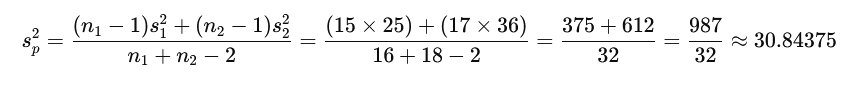

Стандартная ошибка:

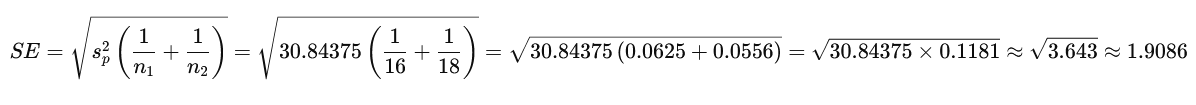

t-статистика:

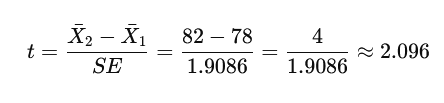

Степени свободы:
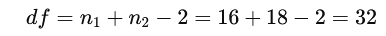

Из таблицы t-распределения

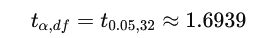

**t=2.096 больше tα=1.6939**, поэтому мы отклоняем нулевую гипотезу.

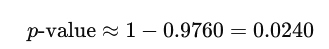

Поскольку p-value=0.0240 меньше уровня значимости α=0.05, мы отклоняем нулевую гипотезу.

In [ ]:
import numpy as np
from scipy import stats

# Данные задачи
n1 = 16          # Размер выборки группы A
x1_bar = 78      # Среднее группы A
s1 = 5           # Стандартное отклонение группы A

n2 = 18          # Размер выборки группы B
x2_bar = 82      # Среднее группы B
s2 = 6           # Стандартное отклонение группы B

alpha = 0.05     # Уровень значимости

# Шаг 4: Объединенная выборочная дисперсия
df = n1 + n2 - 2
sp2 = ((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / df
print(f"Объединенная выборочная дисперсия (sp^2): {sp2:.4f}")

# Шаг 5: Стандартная ошибка
SE = np.sqrt(sp2 * (1/n1 + 1/n2))
print(f"Стандартная ошибка (SE): {SE:.4f}")

# Шаг 6: t-статистика
t_stat = (x2_bar - x1_bar) / SE
print(f"t-статистика: {t_stat:.4f}")

# Шаг 7: Критическое значение t
t_critical = stats.t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_critical:.4f}")

# Шаг 8: p-значение
p_value = 1 - stats.t.cdf(t_stat, df)
print(f"p-значение: {p_value:.4f}")

# Принятие решения
if t_stat >= t_critical:
    print("Отклоняем нулевую гипотезу: средний результат во второй группе значимо выше.")
else:
    print("Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата во второй группе.")


Объединенная выборочная дисперсия (sp^2): 30.8438
Стандартная ошибка (SE): 1.9082
t-статистика: 2.0962
Критическое значение t: 1.6939
p-значение: 0.0220
Отклоняем нулевую гипотезу: средний результат во второй группе значимо выше.


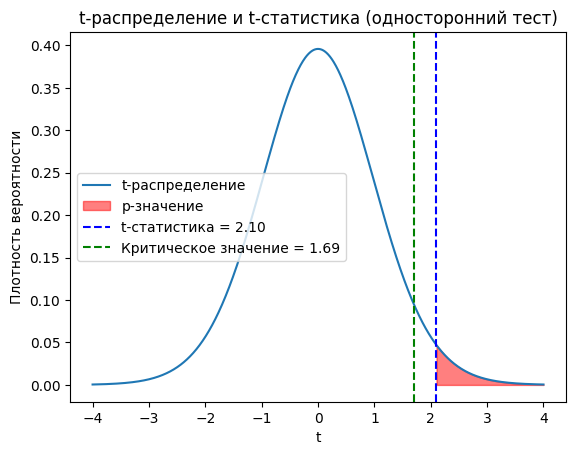

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Диапазон значений t
t_values = np.linspace(-4, 4, 1000)
pdf = stats.t.pdf(t_values, df)

# Критическое значение
t_critical = stats.t.ppf(1 - alpha, df)

# Построение графика
plt.plot(t_values, pdf, label='t-распределение')

# Закрашиваем область p-значения
plt.fill_between(t_values, pdf, where=(t_values >= t_stat), color='red', alpha=0.5, label='p-значение')

# Отмечаем t-статистику
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика = {t_stat:.2f}')

# Отмечаем критическое значение
plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')

plt.legend()
plt.title('t-распределение и t-статистика (односторонний тест)')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.show()


# Задача 5

Диетолог утверждает, что среднее содержание натрия в определенной марке консервированного супа составляет 600 мг на порцию. Агентство по защите прав потребителей подозревает, что содержание натрия выше заявленного. Они случайным образом выбрали 10 банок этого супа и измерили содержание натрия, получив среднее значение 630 мг на порцию с выборочным стандартным отклонением 20 мг.

Требуется:

На уровне значимости α = 0.05 проверить, превышает ли среднее содержание натрия заявленное диетологом значение.

Нулевая гипотеза (H₀): Среднее содержание натрия равно 600 мг или меньше.
H0​:μ≤600 мг
Альтернативная гипотеза (H₁): Среднее содержание натрия превышает 600 мг.
H1:μ>600 мг
Это односторонний правосторонний t-тест.

t-критерий для одного среднего применяется, если:

Выборка случайная и независимая. В задаче говорится о случайном выборе 10 банок, значит, условие выполняется.

Распределение выборки нормально. Поскольку размер выборки малый (n=10), важно, чтобы данные были из нормально распределенной и или близки к нормальному распределению. Предположим, что это условие выполняется.

Стандартное отклонение неизвестно. В задаче известно выборочное стандартное отклонение s=20 мг, а стандартное отклонение неизвестно.

Стандартная ошибка среднего (SE): \

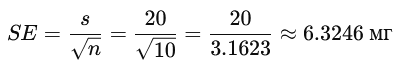

t-статистика:

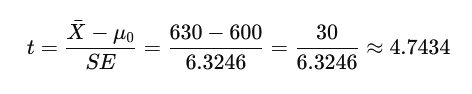

Степени свободы:

 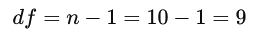

Критическое значение t при α = 0.05 и df = 9 для одностороннего правостороннего теста:

Используя таблицу t-распределения

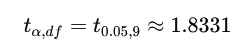

t=4.7434 больше tα=1.8331 поэтому мы отклоняем нулевую гипотезу.

Вывод: Есть статистически значимые доказательства того, что среднее содержание натрия в супе превышает заявленные 600 мг на порцию.

In [ ]:
import numpy as np
from scipy import stats

# Данные задачи
mu0 = 600         # Заявленное среднее содержание натрия (мг)
n = 10            # Размер выборки
x_bar = 630       # Выборочное среднее (мг)
s = 20            # Выборочное стандартное отклонение (мг)
alpha = 0.05      # Уровень значимости

# Шаг 3: Стандартная ошибка
SE = s / np.sqrt(n)
print(f"Стандартная ошибка (SE): {SE:.4f} мг")

# Шаг 4: t-статистика
t_stat = (x_bar - mu0) / SE
print(f"t-статистика: {t_stat:.4f}")

# Шаг 5: Критическое значение t
df = n - 1
t_critical = stats.t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_critical:.4f}")

# Шаг 6: p-значение
p_value = 1 - stats.t.cdf(t_stat, df)
print(f"p-значение: {p_value:.4f}")

# Принятие решения
if t_stat >= t_critical:
    print("Отклоняем нулевую гипотезу: среднее содержание натрия превышает заявленное.")
else:
    print("Не отклоняем нулевую гипотезу: нет статистически значимого превышения содержания натрия.")


Стандартная ошибка (SE): 6.3246 мг
t-статистика: 4.7434
Критическое значение t: 1.8331
p-значение: 0.0005
Отклоняем нулевую гипотезу: среднее содержание натрия превышает заявленное.


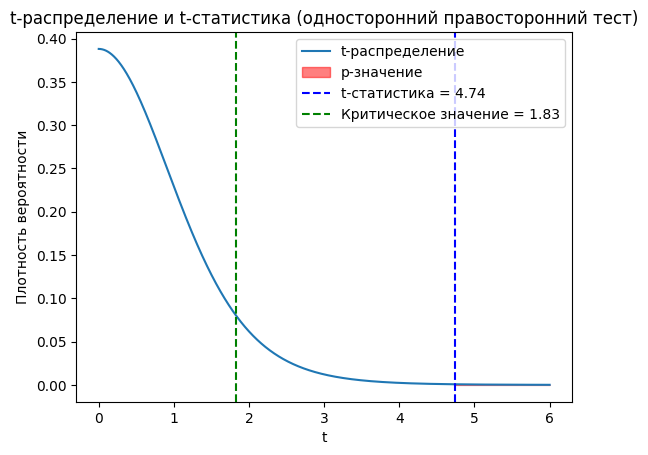

In [ ]:
import matplotlib.pyplot as plt

# Диапазон значений t
t_values = np.linspace(0, 6, 1000)
pdf = stats.t.pdf(t_values, df)

# Критическое значение
t_critical = stats.t.ppf(1 - alpha, df)

# Построение графика
plt.plot(t_values, pdf, label='t-распределение')

# Закрашиваем область p-значения
plt.fill_between(t_values, pdf, where=(t_values >= t_stat), color='red', alpha=0.5, label='p-значение')

# Отмечаем t-статистику
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика = {t_stat:.2f}')

# Отмечаем критическое значение
plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')

plt.legend()
plt.title('t-распределение и t-статистика (односторонний правосторонний тест)')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.show()


# Задача 6

Группа из 10 пациентов проходит курс лечения для снижения артериального давления. Давление измеряется до и после лечения для каждого пациента. Среднее давление до лечения составляет 150 мм рт. ст., после лечения — 140 мм рт. ст.. Выборочное стандартное отклонение разностей составляет 8 мм рт. ст.

Требуется:

На уровне значимости α = 0.01 определить, снизилось ли артериальное давление после лечения.

Нулевая гипотеза (H₀): Среднее разницы давлений (после - до) равно нулю или больше.  H0​:μd​=0

Альтернативная гипотеза (H₁): Среднее разницы давлений (после - до) меньше нуля (т.е. давление снизилось).  H1​:μd​<0

μd​ — среднее значение разностей давлений (после - до).

Это односторонний левосторонний парный t-тест.

Среднее значение разностей:

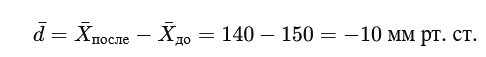

Выборочное стандартное отклонение разностей: sd=8 рт. ст.

Стандартная ошибка среднего разностей (SE)


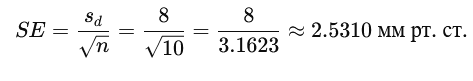

t-статистика:

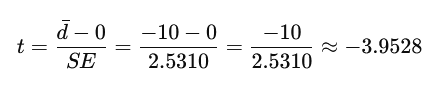

Степени свободы:

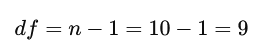

Критическое значение t при α = 0.01 и df = 9 для одностороннего левостороннего теста:

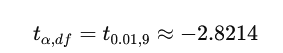

Сравнение:

t=−3.9528 меньше tα=−2.8214, поэтому мы отклоняем нулевую гипотезу.

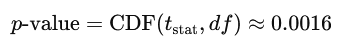

In [ ]:
import numpy as np
from scipy import stats

# Данные задачи
n = 10            # Количество пар наблюдений
d_bar = -10       # Среднее значение разностей (после - до), мм рт. ст.
sd = 8            # Выборочное стандартное отклонение разностей, мм рт. ст.
alpha = 0.01      # Уровень значимости

# Шаг 3: Стандартная ошибка
SE = sd / np.sqrt(n)
print(f"Стандартная ошибка (SE): {SE:.4f} мм рт. ст.")

# Шаг 4: t-статистика
t_stat = (d_bar - 0) / SE
print(f"t-статистика: {t_stat:.4f}")

# Шаг 5: Критическое значение t
df = n - 1
t_critical = stats.t.ppf(alpha, df)
print(f"Критическое значение t: {t_critical:.4f}")

# Шаг 6: p-значение
p_value = stats.t.cdf(t_stat, df)
print(f"p-значение: {p_value:.4f}")

# Принятие решения
if t_stat <= t_critical:
    print("Отклоняем нулевую гипотезу: артериальное давление снизилось после лечения.")
else:
    print("Не отклоняем нулевую гипотезу: нет статистически значимого снижения давления.")


Стандартная ошибка (SE): 2.5298 мм рт. ст.
t-статистика: -3.9528
Критическое значение t: -2.8214
p-значение: 0.0017
Отклоняем нулевую гипотезу: артериальное давление снизилось после лечения.


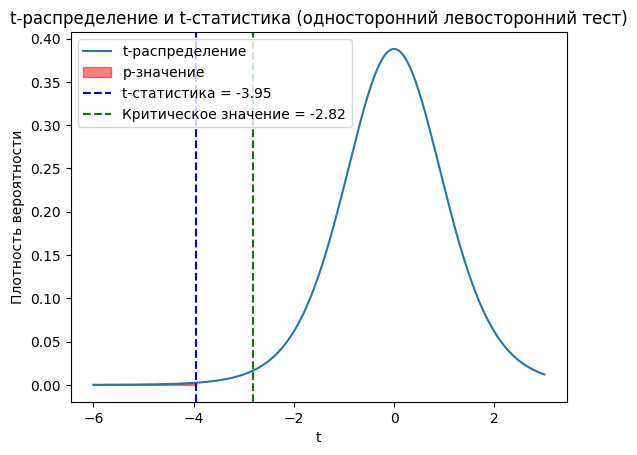

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Диапазон значений t
t_values = np.linspace(-6, 3, 1000)
pdf = stats.t.pdf(t_values, df)

# Критическое значение
t_critical = stats.t.ppf(alpha, df)

# Построение графика
plt.plot(t_values, pdf, label='t-распределение')

# Закрашиваем область p-значения
plt.fill_between(t_values, pdf, where=(t_values <= t_stat), color='red', alpha=0.5, label='p-значение')

# Отмечаем t-статистику
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика = {t_stat:.2f}')

# Отмечаем критическое значение
plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')

plt.legend()
plt.title('t-распределение и t-статистика (односторонний левосторонний тест)')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.show()


# Дополнительне задачи

В городе Фрогус появился шулер в одном из азартных заведений, который, по подозрениям честных граждан, использует нечестный кубик (игральную кость) в игре. Честный гражданин по имени Средус решил поймать шулера, используя статистику.
Шулер приглашает сыграть с ним игру и не верит, что у Средуса получится что-то.

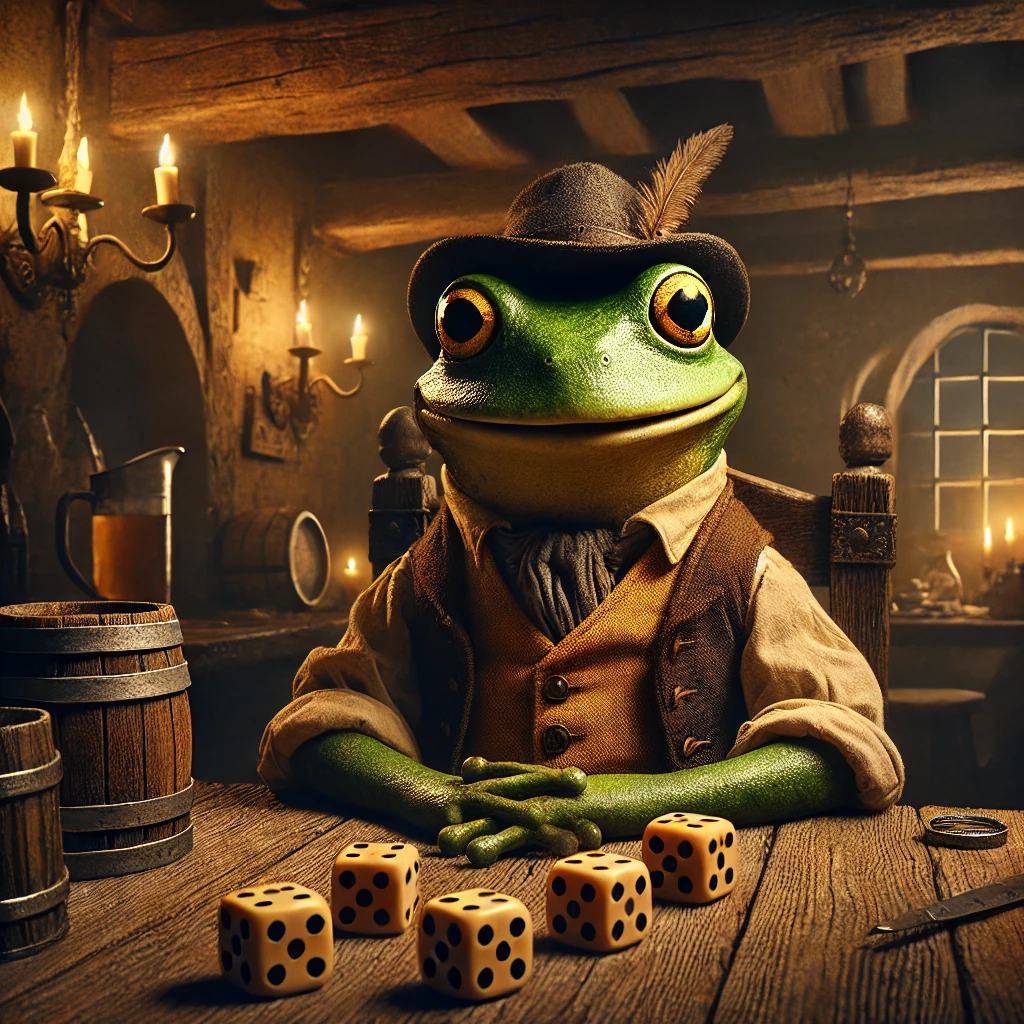

Наблюдение:

Кубик подбрасывают 100 раз.
Из них выпало Y раз число 6.

Для честного кубика вероятность выпадения числа 6 равна p=1/6.
Средус хочет определить, является ли кубик нечестным, то есть проверить, превышает ли реальная вероятность выпадения числа 6 эту вероятность.

Требуется:

(a) При каких значениях Y можно отвергнуть нулевую гипотезу H0:p=1/6 в пользу альтернативной гипотезы H1:p>1/6​ на уровне значимости α=0.05?

Нулевая гипотеза (H0​): Кубик честный, вероятность выпадения числа 6 равна p0=1/6

Альтернативная гипотеза (H1): Кубик нечестный, вероятность выпадения числа 6 больше, чем у честного кубика.

для применения Z-критерия для доли
Чтобы использовать Z-критерий, должны выполняться условия:
1. Случайная выборка: Предполагаем, что броски независимы и случайны.
2. Условия нормальности

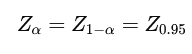

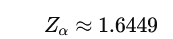

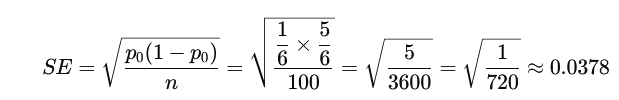

Критическая выборочная доля

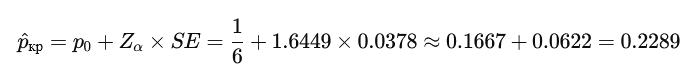

Критическое значение Y:

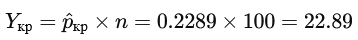

Поскольку Y должно быть целым числом, и мы ищем минимальное Y, при котором можно отвергнуть нулевую гипотезу, то критическое значение Yкр будет:

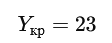

То есть, если число выпадений числа 6 составляет 23 или более, мы отвергаем нулевую гипотезу.

In [ ]:
# Данные задачи
n = 100           # Общее число бросков кубика
p0 = 1/6          # Гипотетическая вероятность выпадения числа 6
alpha = 0.05      # Уровень значимости

# Шаг 3: Критическое значение Z
Z_alpha = norm.ppf(1 - alpha)
print(f"Критическое значение Z_alpha: {Z_alpha:.4f}")

# Стандартная ошибка
SE = np.sqrt(p0 * (1 - p0) / n)
print(f"Стандартная ошибка (SE): {SE:.4f}")

# Критическое значение выборочной пропорции
p_hat_critical = p0 + Z_alpha * SE
print(f"Критическая выборочная пропорция (p̂_кр): {p_hat_critical:.4f}")

# Критическое значение Y
Y_critical = p_hat_critical * n
print(f"Критическое значение Y_кр (до округления): {Y_critical:.4f}")

# Округляем вверх до ближайшего целого
Y_critical_int = int(np.ceil(Y_critical))
print(f"Критическое значение Y_кр (целое): {Y_critical_int}")

# Проверка: вычисляем Z для Y = 23
Y_test = Y_critical_int
p_hat_test = Y_test / n
Z_test = (p_hat_test - p0) / SE
p_value = 1 - norm.cdf(Z_test)
print(f"\nПроверка для Y = {Y_test}:")
print(f"Выборочная пропорция (p̂): {p_hat_test:.4f}")
print(f"Z-статистика: {Z_test:.4f}")
print(f"p-значение: {p_value:.4f}")

# Выводим критические значения Y для диапазона Y
print("\nКритические значения Y и соответствующие p-значения:")
print("Y\tp-value\t\tDecision")
for Y in range(Y_critical_int - 2, Y_critical_int + 3):
    p_hat = Y / n
    Z = (p_hat - p0) / SE
    p_value = 1 - norm.cdf(Z)
    decision = "Reject H0" if p_value < alpha else "Fail to reject H0"
    print(f"{Y}\t{p_value:.4f}\t{decision}")


Критическое значение Z_alpha: 1.6449
Стандартная ошибка (SE): 0.0373
Критическая выборочная пропорция (p̂_кр): 0.2280
Критическое значение Y_кр (до округления): 22.7967
Критическое значение Y_кр (целое): 23

Проверка для Y = 23:
Выборочная пропорция (p̂): 0.2300
Z-статистика: 1.6994
p-значение: 0.0446

Критические значения Y и соответствующие p-значения:
Y	p-value		Decision
21	0.1225	Fail to reject H0
22	0.0762	Fail to reject H0
23	0.0446	Reject H0
24	0.0245	Reject H0
25	0.0127	Reject H0


Влияние размера выборки на тест

Меньший размер выборки приводит к большей стандартной ошибке (SE увеличивается), что делает тест менее чувствительным.
Поэтому при меньшем числе бросков нам требуется меньшая абсолютная разница в количестве успехов (Y), чтобы отклонить нулевую гипотезу, но относительная разница (процент успехов) должна быть больше.

При большем числе бросков статистический тест будет более надежным и чувствительным к небольшим отклонениям от p0p0​.

**Примечание:** В реальных условиях, для более точного анализа, можно использовать точный критерий биномиальных пропорций (критерий Бернулли), особенно при малых выборках.

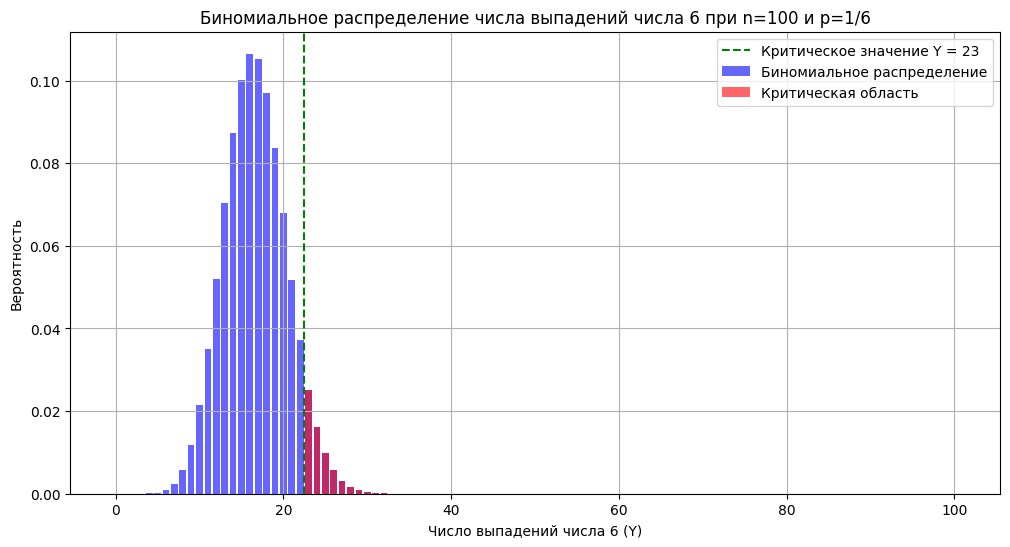

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Данные задачи
n = 100
p0 = 1/6
alpha = 0.05

# Вычисляем вероятности для всех возможных Y
Y_values = np.arange(0, n+1)
probabilities = binom.pmf(Y_values, n, p0)

# Критическое значение Y
Z_alpha = norm.ppf(1 - alpha)
SE = np.sqrt(p0 * (1 - p0) / n)
p_hat_critical = p0 + Z_alpha * SE
Y_critical = int(np.ceil(p_hat_critical * n))

# Построение графика
plt.figure(figsize=(12,6))
plt.bar(Y_values, probabilities, color='blue', alpha=0.6, label='Биномиальное распределение')

# Закрашиваем критическую область
plt.bar(Y_values[Y_values >= Y_critical], probabilities[Y_values >= Y_critical], color='red', alpha=0.6, label='Критическая область')

plt.axvline(Y_critical - 0.5, color='green', linestyle='--', label=f'Критическое значение Y = {Y_critical}')
plt.title('Биномиальное распределение числа выпадений числа 6 при n=100 и p=1/6')
plt.xlabel('Число выпадений числа 6 (Y)')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()


Ниже представлена таблица со статистическими критериями, которые мы применяли при решении задач, условиями их применения и пояснениями.

---

| **Задача №** | **Примененный статистический критерий**                      | **Условия применения**                                                                                                                                                                                                                                                                                                        | **Когда применять**                                                                                                                                                                                            |
|--------------|--------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1**        | **Z-критерий для доли**                                       | - **Большой размер выборки**: $n \times p_0 \geq 5$ и $n \times (1 - p_0) \geq 5$.<br>- **Выборка случайная и независимая**.<br>- **Проверяется гипотеза о доле (пропорции)** в генеральной совокупности.<br>- **Известна гипотетическая доля** $p_0$.                                                                       | Когда нужно проверить, соответствует ли наблюдаемая доля заданному значению при большом размере выборки.                                                                                                        |
| **2**        | **Z-критерий для разности долей**                             | - **Большие размеры выборок**: для каждой выборки $n_i \times p_i \geq 5$ и $n_i \times (1 - p_i) \geq 5$.<br>- **Выборки независимые и случайные**.<br>- **Сравниваются доли (пропорции)** из двух независимых выборок.<br>- **Известны выборочные доли** $\hat{p}_1$ и $\hat{p}_2$.                                       | Когда сравниваются доли между двумя независимыми группами с большими выборками.                                                                                                                                |
| **3**        | **Z-критерий для среднего**                                   | - **Известно стандартное отклонение и** $\sigma$.<br>- **Выборка случайная и независимая**.<br>- **Распределение выборочного среднего нормально** (благодаря ЦПТ при $n \geq 30$).<br>- **Размер выборки большой** ($n \geq 30$) или данные из нормального распределения.                                                 | Когда известно стандартное отклонение и и выборка большая, проверяется гипотеза о среднем значении.                                                                                                    |
| **4**        | **t-критерий для разности средних (независимые выборки)**     | - **Неизвестны стандартные отклонения**.<br>- **Выборки независимые и случайные**.<br>- **Распределение выборок приблизительно нормальное**.<br>- **Проверяется разница средних** между двумя независимыми группами.<br>- **Дисперсии групп равны** или приблизительно равны (проверяется тестом Фишера).    | Когда сравниваются средние двух независимых групп с неизвестными стандартными отклонениями и равными дисперсиями.                                                                                              |
| **5**        | **t-критерий для среднего**                                   | - **Неизвестно стандартное отклонение и**.<br>- **Выборка случайная и независимая**.<br>- **Распределение выборки приблизительно нормальное**.<br>- **Размер выборки малый** ($n < 30$).                                                                                                                               | При малой выборке и неизвестном стандартном отклонении и, если данные приблизительно нормальны.                                                                                                         |
| **6**        | **Парный t-критерий для средних (зависимые выборки)**         | - **Данные связаны** (парные наблюдения, например, до и после).<br>- **Неизвестно стандартное отклонение разностей**.<br>- **Распределение разностей приблизительно нормальное**.<br>- **Выборка случайная и зависимая**.<br>- **Размер выборки малый или средний**.                                                       | Когда сравниваются средние в парных наблюдениях (например, до и после воздействия).                                                                                                                            |
| **7**        | **Z-критерий для доли**                                       | - **Большой размер выборки**: $n \times p_0 \geq 5$ и $n \times (1 - p_0) \geq 5$.<br>- **Выборка случайная и независимая**.<br>- **Проверяется гипотеза о вероятности успеха в биномиальном эксперименте**.<br>- **Известна гипотетическая вероятность** $p_0$.                                                          | Когда проверяется гипотеза о вероятности успеха в биномиальном эксперименте с большим размером выборки.                                                                                                        |

---

### Задача 1: Z-критерий для доли

- **Когда применять:** Когда нужно проверить, соответствует ли наблюдаемая доля заданному значению при большом размере выборки.
- **Пример:** Проверка соответствия процента дефектных изделий установленному стандарту.

### Задача 2: Z-критерий для разности долей

- **Когда применять:** При сравнении долей между двумя независимыми группами с большими выборками.
- **Пример:** Сравнение эффективности двух рекламных кампаний по отклику клиентов.

### Задача 3: Z-критерий для среднего

- **Когда применять:** Когда известно стандартное отклонение популяции и выборка большая.
- **Пример:** Проверка соответствия среднего веса продукта заявленному производителем.

### Задача 4: t-критерий для разности средних (независимые выборки)

- **Когда применять:** При сравнении средних двух независимых групп с неизвестными стандартными отклонениями и равными дисперсиями.
- **Пример:** Сравнение результатов тестирования двух разных методов обучения.

### Задача 5: t-критерий для среднего

- **Когда применять:** При малой выборке и неизвестном стандартном отклонении популяции, если данные приблизительно нормальны.
- **Пример:** Проверка, превышает ли содержание вещества в продукте допустимый уровень.

### Задача 6: Парный t-критерий для средних (зависимые выборки)

- **Когда применять:** При сравнении средних в зависимых выборках (парные данные), например, до и после воздействия.
- **Пример:** Оценка эффективности лечения путем сравнения показателей до и после терапии.

### Задача 7: Z-критерий для доли

- **Когда применять:** При проверке гипотезы о вероятности успеха в биномиальном эксперименте с большим размером выборки.
- **Пример:** Определение, является ли игральная кость честной на основе числа выпадений определенного значения.


# Разбор бизнесовых задач

**Их забрали на курс АБ-тесты**

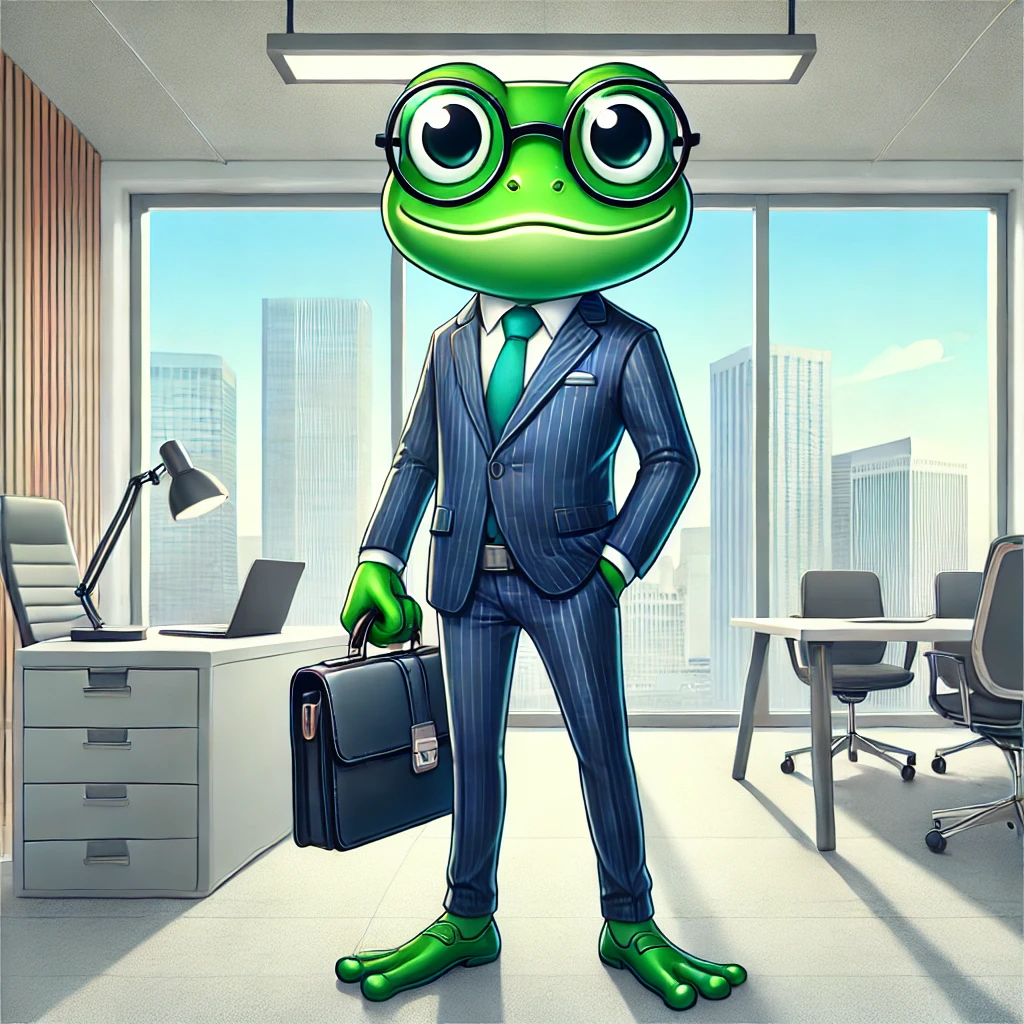